## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
#loading data

df = pd.read_csv('data/kc_house_data.csv', index_col='id')

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

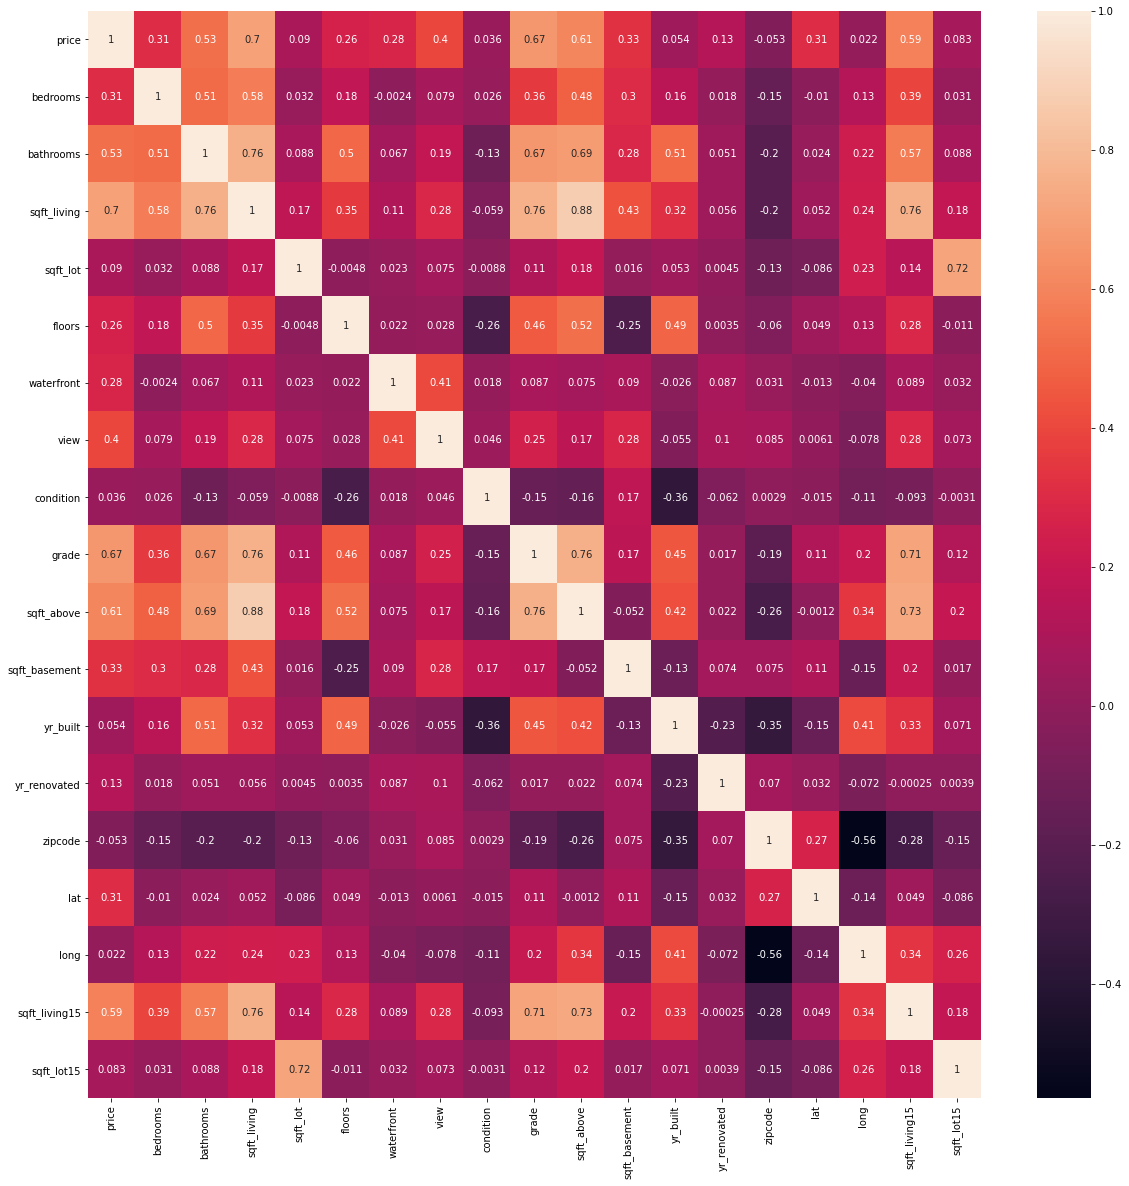

In [4]:
# column data type cleanup (Zach)
df.date =  pd.to_datetime(df.date, format='%m/%d/%Y')
df.waterfront.replace({'NO': 0, 'YES': 1}, inplace=True)
df.view.replace({'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}, inplace=True)
df.condition.replace({'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}, inplace=True)
df.grade.replace({'3 Poor': 0, '4 Low': 1, '5 Fair': 2, '6 Low Average': 3, '7 Average': 4, '8 Good': 5, 
                  '9 Better': 6, '10 Very Good': 7, '11 Excellent': 8, '12 Luxury': 9, '13 Mansion': 10}, inplace=True)
df.sqft_basement.replace('?', np.NaN, inplace=True)
df.sqft_basement = df.sqft_basement.astype(float)

# corr matrix and heatmap
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [5]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,2,4,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,2,4,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,2,3,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,4,4,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,2,5,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,2,8,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,2,4,1715,NaN,1995,0.0,98003,47.3097,-122.327,2238,6819
2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,2,4,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,2,4,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  float64       
 8   view           21534 non-null  float64       
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21143 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipco

In [7]:
df.fillna(0, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,2,4,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,2,4,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,2,3,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,4,4,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,2,5,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


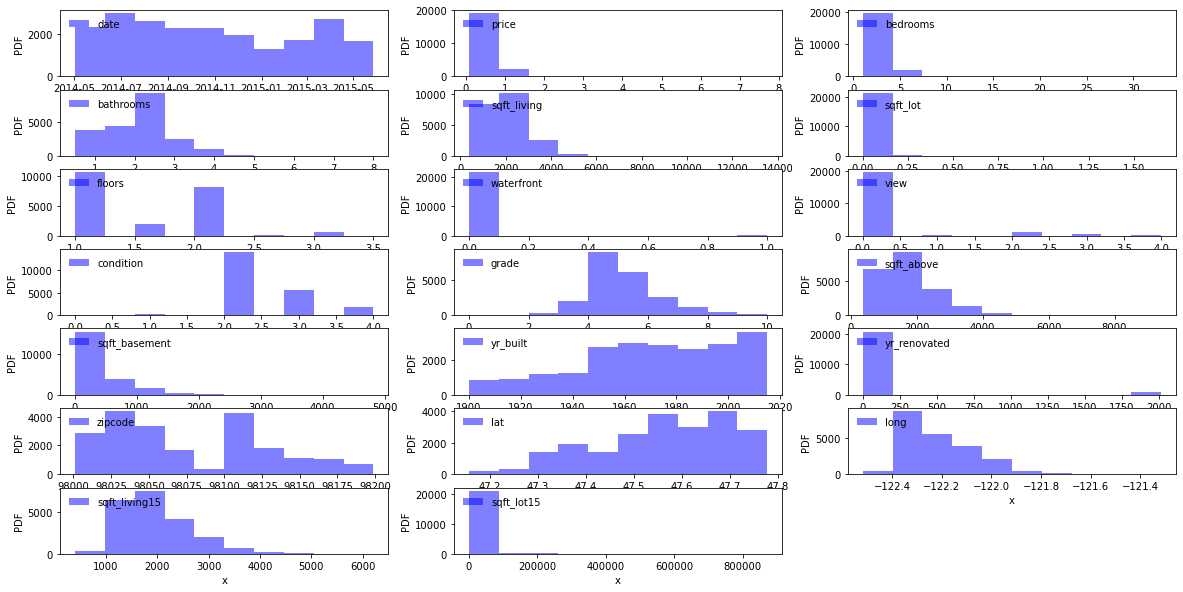

In [8]:
#determine normal distribution of features (Adonis)
ncols = 3
nrows = int(np.ceil(len(df.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))

# Lazy counter so we can remove unwated axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(df.columns):

            ax.hist(df[df.columns[counter]], bins=10, color='blue', alpha=0.5, label='{}'.format(df.columns[counter]))
            ax.set_xlabel('x')
            ax.set_ylabel('PDF')
            #ax.set_ylim([0, 5])
            leg = ax.legend(loc='upper left')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

## BASELINE LINEAR REGRESSION MODEL

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.dummy import DummyRegressor

In [10]:
#modeling price against grade and sqft_living, as those had the highest corr values in heatmap
formula_b = 'price ~ sqft_living'
model_b = ols(formula=formula_b, data=df).fit()
model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:39:50   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Q-Q plot for baseline models

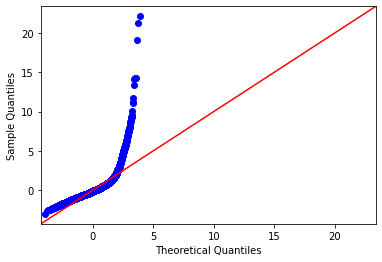

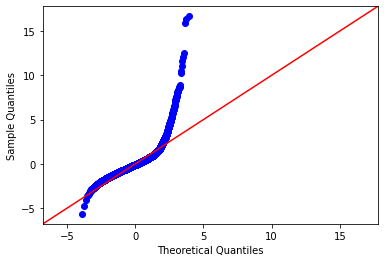

In [11]:
f2 = 'price ~ grade'
model_c = smf.ols(formula=f2, data=df).fit()
model_b2 = smf.ols(formula=formula_b, data=df).fit()
resid1 = model_c.resid
resid2 = model_b2.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)

### Insight: can we transform or otherwise augment the data to approach a normal distribution?

In [12]:
#df['grade'].value_counts()
'''0-5 are low quality houses, 6-10 are avg to high quality houses. Depending on stakeholder request, either group
can be modeled. Therefore, model both, but divide the dataframe'''


'0-5 are low quality houses, 6-10 are avg to high quality houses. Depending on stakeholder request, either group\ncan be modeled. Therefore, model both, but divide the dataframe'

## MODEL CREATION (statsmodels, Inferential)

In [17]:
#model with all house related features
formula = 'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated'
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     3123.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:40:09   Log-Likelihood:            -2.9596e+05
No. Observations:               21597   AIC:                         5.920e+05
Df Residuals:                   21583   BIC:                         5.921e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.592e+06   1.37e+05     48.197      0.000    6.32e+06    6.86e+06
bedrooms       -3.89e+04   2037.558    -19.089      0.000   -4.29e+04   -3.49e+04
bathrooms      4.602e+04   3504.784     13.132      0.000    3.92e+04    5.29e+04
sqft_living     112.9414     19.427      5.814      0.000      74.864     151.019
sqft_lot         -0.2602      0.037     -7.099      0.000      -0.332      -0.188
floors         2.453e+04   3743.922      6.552      0.000    1.72e+04    3.19e+04
waterfront     6.073e+05   1.95e+04     31.153      0.000    5.69e+05    6.45e+05
view           4.566e+04   2237.180     20.408      0.000    4.13e+04       5e+04
condition      1.958e+04   2495.876      7.843      0.000    1.47e+04    2.45e+04
grade          1.254e+05   2173.165     57.701      0.000    1.21e+05     1.3e+05
sqft_above       56.4811     19.371      2.916      0.004      18.512      94.450
sqft_basement    59.1871     19.258      3.073      0.002      21.440      96.934
yr_built      -3577.1964     70.235    -50.932      0.000   -3714.863   -3439.530
yr_renovated     12.6839      4.267      2.973      0.003       4.321      21.047
==============================================================================
Omnibus:                    16024.784   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1091522.501
Skew:                           2.966   Prob(JB):                         0.00
Kurtosis:                      37.319   Cond. No.                     4.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#model with most correlated features from heatmap
formula1 = 'price ~ bathrooms + sqft_living + grade + sqft_above'
model1 = ols(formula=formula1, data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     6434.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:40:10   Log-Likelihood:            -2.9892e+05
No. Observations:               21597   AIC:                         5.978e+05
Df Residuals:                   21592   BIC:                         5.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.078e+05   7427.317    -41.445      0.000   -3.22e+05   -2.93e+05
bathrooms   -3.723e+04   3431.175    -10.849      0.000    -4.4e+04   -3.05e+04
sqft_living   252.4879      4.353     58.000      0.000     243.955     261.021
grade        1.159e+05   2366.154     48.968      0.000    1.11e+05    1.21e+05
sqft_above    -77.1922      4.416    -17.482      0.000     -85.847     -68.537
==============================================================================
Omnibus:                    17067.412   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1065708.366
Skew:                           3.319   Prob(JB):                         0.00
Kurtosis:                      36.767   Cond. No.                     1.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#model based on sqft
formula2 = 'price ~ sqft_living + sqft_above + sqft_lot + sqft_basement'
model2 = ols(formula=formula2, data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     5275.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:40:10   Log-Likelihood:            -3.0003e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21592   BIC:                         6.001e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.188e+04   4451.770     -9.408      0.000   -5.06e+04   -3.32e+04
sqft_living     238.9967     23.088     10.352      0.000     193.743     284.250
sqft_above       40.5143     23.167      1.749      0.080      -4.895      85.924
sqft_lot         -0.2802      0.044     -6.413      0.000      -0.366      -0.195
sqft_basement    58.6532     23.236      2.524      0.012      13.110     104.197
==============================================================================
Omnibus:                    14690.310   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           530212.347
Skew:                           2.793   Prob(JB):                         0.00
Kurtosis:                      26.622   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

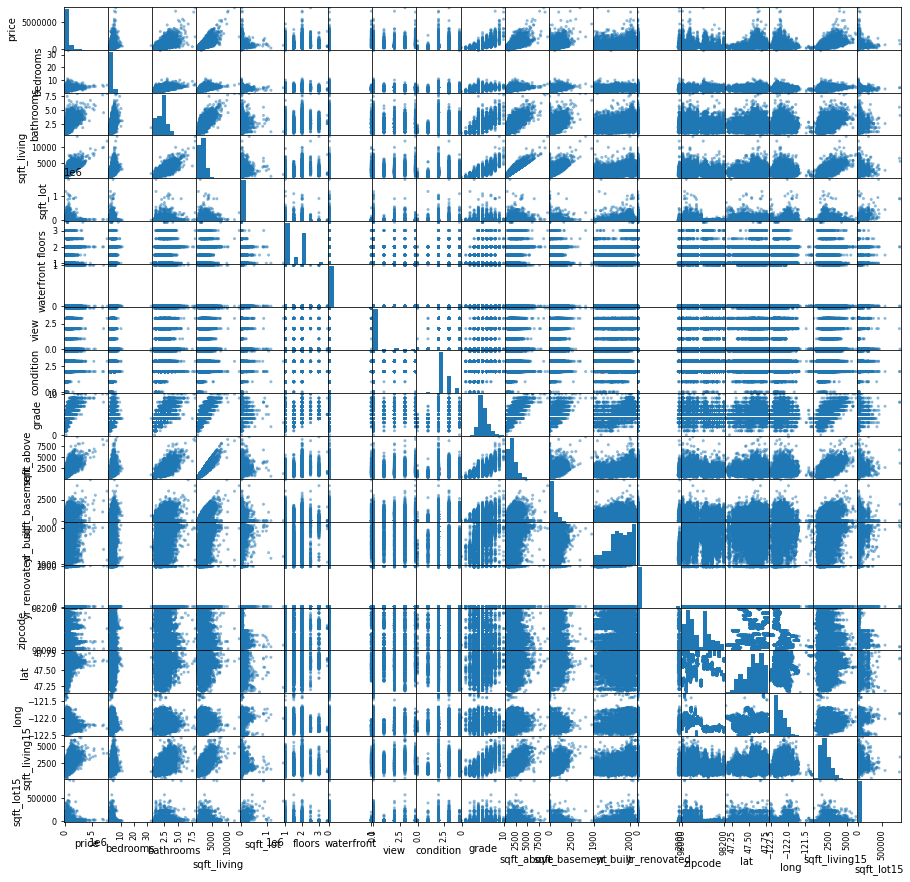

In [64]:
axes = pd.plotting.scatter_matrix(df, figsize=[15, 15]);
plt.show()

In [62]:
# for i in axes[0,:]:
#     i.plot()
    
# plt.show()

## MODEL CREATION (SKLEARN, predictive)

In [22]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [23]:
y = df[['price']]
X = df.drop(['price', 'date'], axis=1)

In [24]:
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.7000961802069593

In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

In [26]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [27]:
#create dummy regressor as baseline
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
dy_pred = dummy.predict(X_train)
dy_pred_test = dummy.predict(X_test)

In [28]:
dummy.score(X_train, y_train)

0.0

In [29]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [30]:
linreg.score(X_test, y_test)

0.693958710978617

In [31]:
r2_score(y_test, y_pred_test)

0.693958710978617

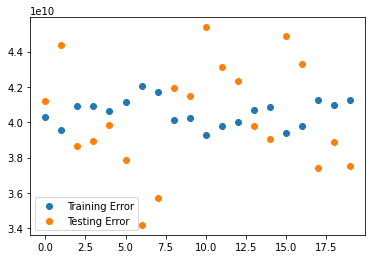

In [32]:
num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

In [33]:
cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
print("cv_5_results: ", cv_5_results)
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
print('cv_10_results: ', cv_10_results)
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))
print('cv_20_results: ', cv_20_results)

cv_5_results:  -41146224450.705475
cv_10_results:  -41008306375.16759
cv_20_results:  -40784776532.97865


In [34]:
print(r2_score(y, linreg.predict(X)))

0.6998808270660786


### Will scaling the features improve the model?

In [35]:
scaler = StandardScaler()

In [46]:
scaler.fit(X_train)

StandardScaler()

In [47]:
scaler.mean_

array([ 3.37101349e+00,  2.11835099e+00,  2.08065133e+03,  1.52033707e+04,
        1.49328587e+00,  6.65624819e-03,  2.29090699e-01,  2.40828848e+00,
        4.65995254e+00,  1.78771019e+03,  2.87372808e+02,  1.97099687e+03,
        6.86142270e+01,  9.80779074e+04,  4.75604360e+01, -1.22213985e+02,
        1.98683099e+03,  1.27341479e+04])

In [48]:
scaler.transform(X_train)

array([[-0.40135136,  0.49660268,  0.0757502 , ...,  1.38826743,
         0.42833971, -0.31557497],
       [-0.40135136, -1.45520118, -0.87455891, ...,  1.55202419,
        -1.06194913, -0.20599449],
       [ 1.76218916,  1.79780525,  1.55036779, ...,  1.70866109,
         1.64102573, -0.07059096],
       ...,
       [-0.40135136, -1.45520118, -0.96194366, ..., -0.07842354,
        -0.65285023, -0.1137534 ],
       [-0.40135136,  0.17130203,  0.47990465, ...,  2.39216756,
         0.01924081,  7.41957932],
       [ 1.76218916,  0.49660268,  0.15221185, ...,  0.32028857,
        -0.30219403, -0.18716674]])

In [50]:
X_test.values[0]

array([ 4.00000e+00,  1.75000e+00,  2.24000e+03,  9.88600e+03,
        1.50000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        4.00000e+00,  2.24000e+03,  0.00000e+00,  1.96500e+03,
        0.00000e+00,  9.80080e+04,  4.76294e+01, -1.22116e+02,
        1.54000e+03,  8.04000e+03])

In [54]:
#create X_train_scaled to store different models

regression = LinearRegression()
regression.fit(scaler.transform(X_train), y_train)
regression.score(scaler.transform(X_test), y_test)

0.6996825953807043

In [53]:
X_test.values

array([[ 4.00000e+00,  1.75000e+00,  2.24000e+03, ..., -1.22116e+02,
         1.54000e+03,  8.04000e+03],
       [ 3.00000e+00,  1.50000e+00,  1.49000e+03, ..., -1.22351e+02,
         1.33000e+03,  6.60400e+03],
       [ 3.00000e+00,  2.50000e+00,  1.98100e+03, ..., -1.22178e+02,
         1.98100e+03,  5.89400e+03],
       ...,
       [ 3.00000e+00,  1.00000e+00,  1.32000e+03, ..., -1.22288e+02,
         1.66000e+03,  5.43800e+03],
       [ 4.00000e+00,  3.75000e+00,  5.07000e+03, ..., -1.22004e+02,
         4.92000e+03,  1.01930e+05],
       [ 3.00000e+00,  2.50000e+00,  2.97000e+03, ..., -1.22132e+02,
         2.97000e+03,  9.70700e+03]])

In [ ]:
-70552218.71346842

### Feature Engineering

In [5]:
# feature_columns_home = ['price', 'bedrooms', 'bathrooms'**, 'sqft_living', 'sqft_lot',
#        'floors'*, 'waterfront'+, 'view', 'condition', 'grade'+, 'sqft_above',
#        'sqft_basement', 'yr_built'+, 'yr_renovated'] #features directly related to the house

# feature_columns_area = ['zipcode', 'lat'+, 'long', 'sqft_living15'**, 'sqft_lot15'] #features related to area the house is in

In [232]:
y1 = df[['price']]
X1 = df.drop(['price', 'date', 'floors', 'sqft_lot15', 'sqft_living15'], axis=1)

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2,
                                                   random_state=42)

In [246]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [247]:
linreg.score(X_test, y_test)

0.6944227381866099

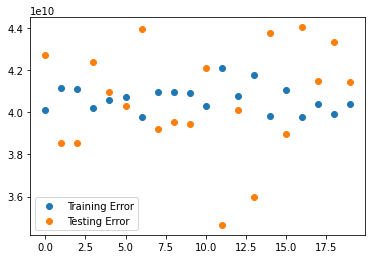

In [236]:
num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

In [237]:
cv_5_results  = np.mean(cross_val_score(linreg, X1, y1, cv=5,  scoring='neg_mean_squared_error'))
print("cv_5_results: ", cv_5_results)
cv_10_results = np.mean(cross_val_score(linreg, X1, y1, cv=10, scoring='neg_mean_squared_error'))
print('cv_10_results: ', cv_10_results)
cv_20_results = np.mean(cross_val_score(linreg, X1, y1, cv=20, scoring='neg_mean_squared_error'))
print('cv_20_results: ', cv_20_results)

cv_5_results:  -41115558026.25482
cv_10_results:  -41011626909.35078
cv_20_results:  -40856821837.00828


In [238]:

train_mse = mean_squared_error(y_train, y_pred)
test_mse = mean_squared_error(y_test, y_pred_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 229669521400.9048
Test Mean Squarred Error: 228859405190.22913


In [ ]:
#polynomial features

pf = PolynomialFeatures()

pf.fit(X)

In [ ]:
pdf = pd.DataFrame(pf.transform(X), columns=pf.get_feature_names())
pdf

In [ ]:
LR = LinearRegression()
LR.fit(pdf, y)


In [ ]:
LR.score(pdf, y)

In [ ]:
print(pdf.corr()['x0'].values)

In [ ]:
pdf.shape

In [ ]:
#correlation matrix for polynomial features
new_corr = []
for col in pdf.columns:
    if pdf.corr()[col].values.any() > 0.70:
        corrMatrix2 = pdf[col].corr(y)
        fig, ax = plt.subplots(figsize=(20,20))  
        sns.heatmap(corrMatrix2, annot=True)
        plt.show()